## Validation of users by Income + job title regression

In this notebook, I aim to perform the final validation of the user voordinates via regression between Income and estimated SES. 
The validation includes:
- Simple linear Regression and multiple linear regression (ordinary least squares) on coordinates and income for nine different models*
- *Model comparison between nine different configurations of markers included in the network
    - Goofness of fit characteristics
- End result is identification of the best marker configuration for obtaining the best linreg fit

In [2]:
import os
import re
import sys
import numpy as np
import pandas as pd
import matplotlib
import spacy
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import FrenchStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

import importlib
# Local application imports
sys.path.insert(0, '../Utility files')
import utils2
from utils2 import *

## 1 Connect job titles and income information to all coordinate files

First and foremost, I need to add all the income + job information per user to each of the nine coordinate files m1-m9
Create a function that:
- Iterates over each file system, from n=1 to n=9
- Removes all users that do not occur in the job title file onlygreenscleaned

In [54]:
#Load the income + job title data
path= '/home/livtollanes/10.jan-thesis/Code/Validation/Data/'
file = 'onlygreens_cleaned.csv'
jobs = pd.read_csv(path + file, index_col= 0, dtype={'follower_id': str})

In total, we have 11 684 unique users with a job title after preprocessing

In [21]:
# #Some job category stats
# pd.set_option('display.max_rows', None)
# jobs['title'] = jobs['title'].str.strip()
# print(jobs['PCS_ESE_name'].value_counts().sort_index())

#jobs['PCS_ESE_name'].nunique() #111 key words/titles, and 58 job categories

PCS_ESE_name
Adjoints administratifs des collectivités locales                                                 347
Aides à domicile, aides ménagères, travailleuses familiales                                         4
Aides-soignants                                                                                    34
Allocataires de la recherche publique                                                             273
Animateurs socioculturels et de loisirs                                                             6
Architectes salariés                                                                               85
Artisans salariés de leur entreprise                                                               45
Artistes de la danse                                                                               16
Artistes de la musique et du chant                                                                356
Artistes dramatiques                                                 

Just to reiterate, these are the models (which markers are included?):
- m1:All
- m2: Remove party
- m3: Remove media, party, university
- m4: Remove media, party, university, football
- m5: Remove media, party, university, lux and vetements and football
- m6: Remove media, party, university, clearly lux brands, and football
- m7: Include only things you can buy (restaurants, commerce, grande distr. Luxe et vet, sport)
- m8: Magazine, media only
- m9: Education, ecole de commerce, lycees only


From these nine models, which contain coordinates for user populations of variable sizes, I am selecting the user coordinates that have job titles. Thus, the final model testing here will be on even smaller sample sizes. 

In [56]:
importlib.reload(utils2)
#Create the user coordinate files for all models - for users with job titles

dfs = []  # list to store all dataframes

for file_number in range(1, 10):  # loop over the coordinate files for models 1 to 9
    filtered_df = utils2.filter_add_jobs_coords(file_number, jobdf=jobs)
    dfs.append(filtered_df)  # add the filtered dataframe to the list

# Now dfs is a list of all the filtered dataframes

Constructed file path: /home/livtollanes/NewData/coordinates/m1_coords/m1_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m2_coords/m2_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m3_coords/m3_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m4_coords/m4_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m5_coords/m5_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m6_coords/m6_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m7_coords/m7_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m8_coords/m8_row_coordinates.csv
Constructed file path: /home/livtollanes/NewData/coordinates/m9_coords/m9_row_coordinates.csv


In [57]:
# Load dfs into variables - printed sample sizes for each model after only including the users for which we have job titles
df1 = dfs[0] #11679 users (there is a 5 user discrepancy between the full CA coord file and the job file due to weirdly formated ID in jobs)
df2 = dfs[1] #11678 users
df3 = dfs[2] #10958 users
df4 = dfs[3] #10681 users
df5 = dfs[4] #10621 users
df6 = dfs[5] #10626 users
df7 = dfs[6] #3538 users
df8 = dfs[7] #11525 users
df9 = dfs[8] #4125 users

## 2 Correlation tests across all models

Here, I am just checking correlations between aggregated coordinate values per job title, and the income. Also checking the correlation between occupational class and income.

In [148]:
from scipy.stats import spearmanr

# Assuming df1 to df9 are your dataframes
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

for i, df in enumerate(dataframes, 1):
    grouped = df.groupby('title').agg({'0': ['median', 'std'], 'Salaire moyen en EQTP': 'first', 'PCS_ESE': 'first'}).reset_index()
    # Extract the first digit of PCS_ESE as the color
    grouped['class'] = grouped['PCS_ESE', 'first'].str[0].astype(int)
    correlation, p_value = spearmanr(grouped[('class')], grouped[('Salaire moyen en EQTP', 'first')])
    if p_value < 0.05:
        print(f"Model m{i}:")
        print(f"Spearman's rank correlation: {correlation}")
        print(f"p-value: {p_value}")
        print("\n")

Model m1:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m2:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m3:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m4:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m5:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m6:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m7:
Spearman's rank correlation: -0.7049748185751002
p-value: 3.327810703761059e-17


Model m8:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m9:
Spearman's rank correlation: -0.6754583722141156
p-value: 3.2273390712826256e-14




Correlations:
- coordinates and salary: not that high overall
    - Dim0: Highest for m1 (-0.31)
    - Dim2: Highest for m2 (-0.38)
- Coordinates and class:  higher than for salaries overall 
    - Dim0: Highest for m2 (-0.383)
- Class and Income: relatively high, but not as high as He&Tsvetkova (-0.7)

In [163]:
for i, df in enumerate(dataframes, 1):
    grouped = df.groupby('title').agg({'0': ['median', 'std'], 'Salaire moyen en EQTP': 'first', 'PCS_ESE': 'first'}).reset_index()
    # Extract the first digit of PCS_ESE as the color
    grouped['class'] = grouped['PCS_ESE', 'first'].str[0].astype(int)
    correlation, p_value = spearmanr(grouped[('class')], grouped[('Salaire moyen en EQTP', 'first')])
    if p_value < 0.05:
        print(f"Model m{i}:")
        print(f"Spearman's rank correlation: {correlation}")
        print(f"p-value: {p_value}")
        print("\n")

Model m1:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m2:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m3:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m4:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m5:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m6:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m7:
Spearman's rank correlation: -0.7049748185751002
p-value: 3.327810703761059e-17


Model m8:
Spearman's rank correlation: -0.7010938155586994
p-value: 7.499467369459125e-18


Model m9:
Spearman's rank correlation: -0.6754583722141156
p-value: 3.2273390712826256e-14




## 3 Model Comparison

Here, I am fitting multidimensional OLS to do model selection. 
The model that gives the best fit will be selected for durther inspection. 

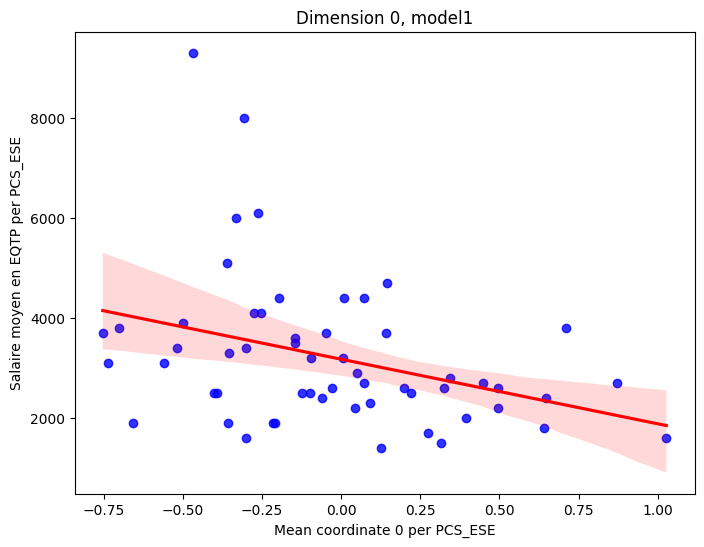

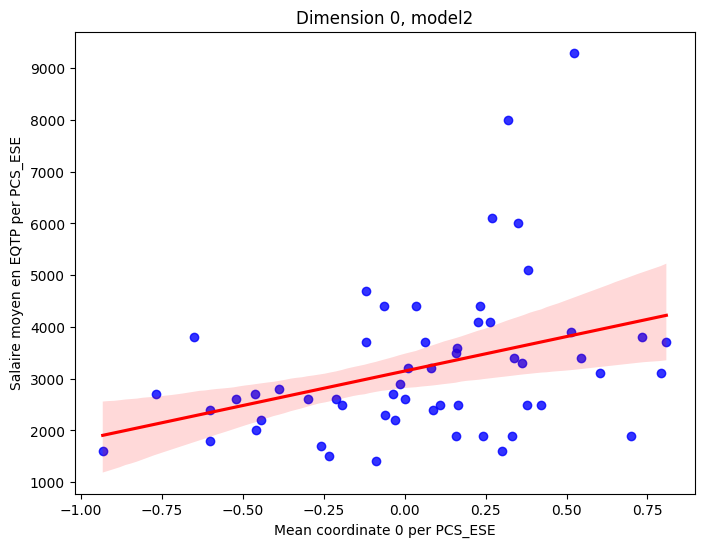

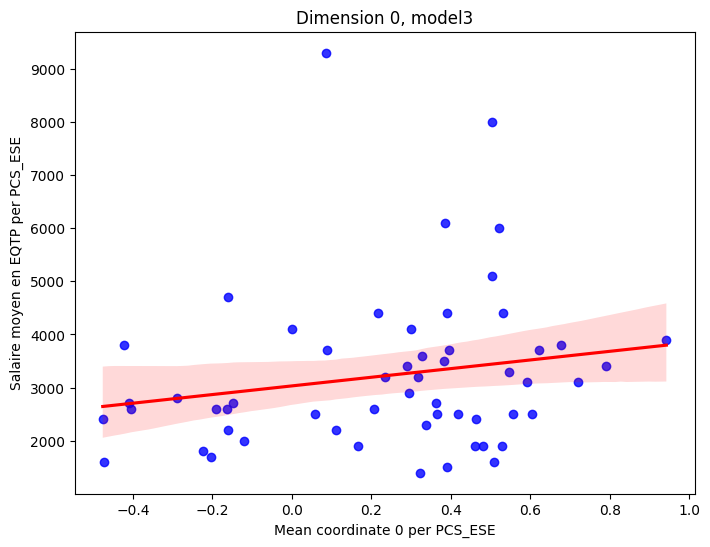

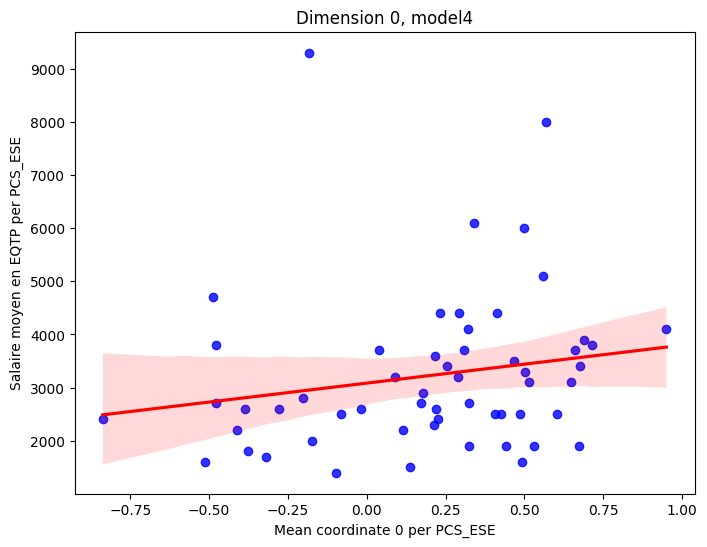

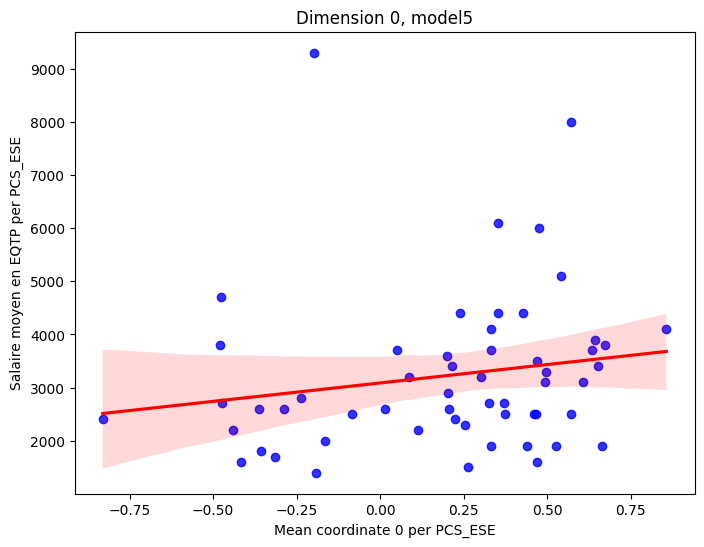

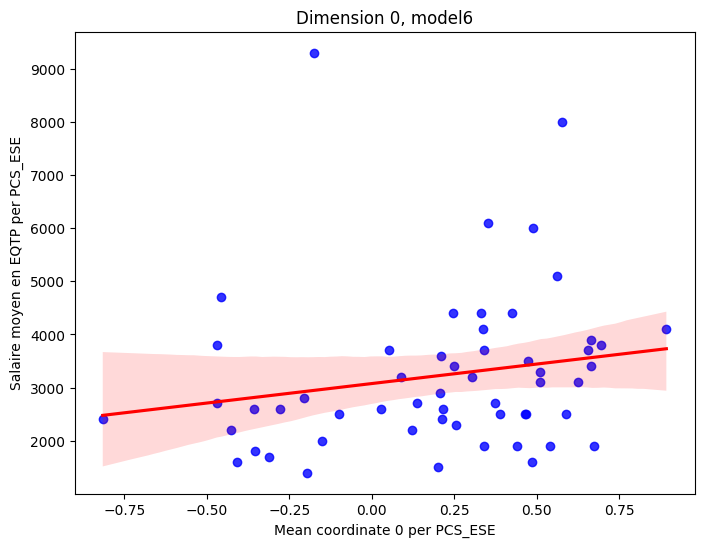

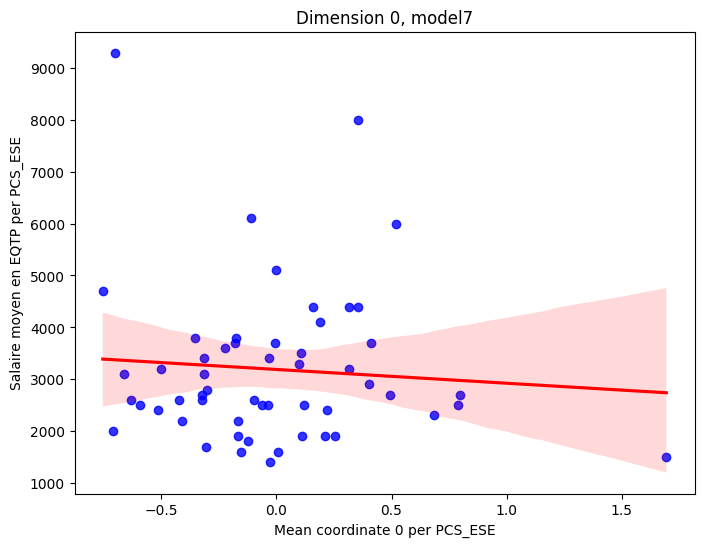

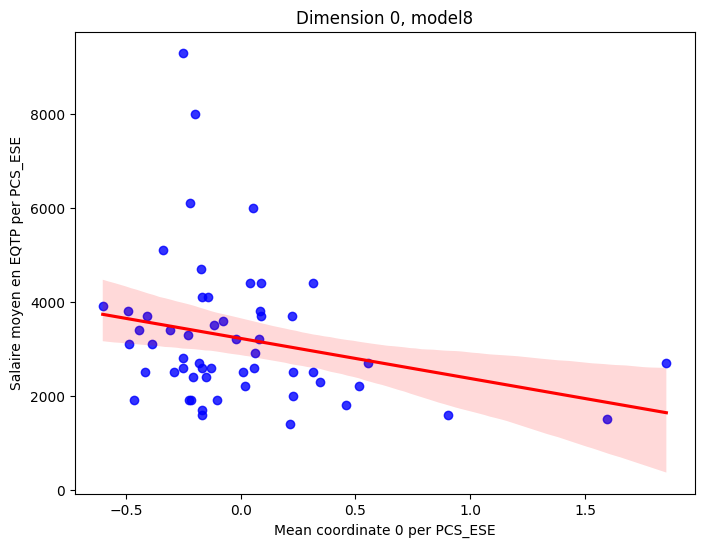

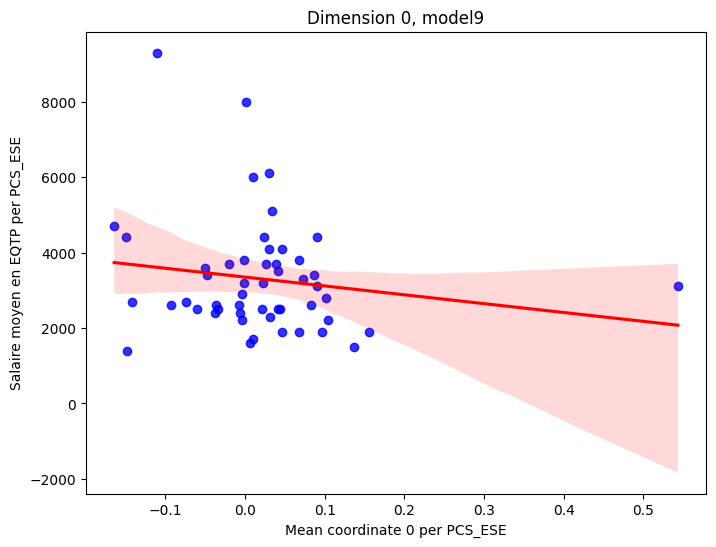

In [80]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

for i, df in enumerate(dataframes, 1):
    X = df[['0']]
    y = df['Salaire moyen en EQTP']


    # Plot relationship between the mean of each independent variable grouped by 'title' and the dependent variable
    for col in X.columns:
        grouped = df.groupby('PCS_ESE')[col].mean()
        income = df.groupby('PCS_ESE')['Salaire moyen en EQTP'].first()
        plt.figure(figsize=(8, 6))
        
        # Use seaborn's regplot function to plot the scatter plot with a regression line and confidence interval
        sns.regplot(x=grouped, y=income, ci=95, color='b', line_kws={'color':'red'})
        
        plt.xlabel(f'Mean coordinate {col} per PCS_ESE')
        plt.ylabel('Salaire moyen en EQTP per PCS_ESE')
        plt.title(f'Dimension {col}, model{i}')
        plt.show()


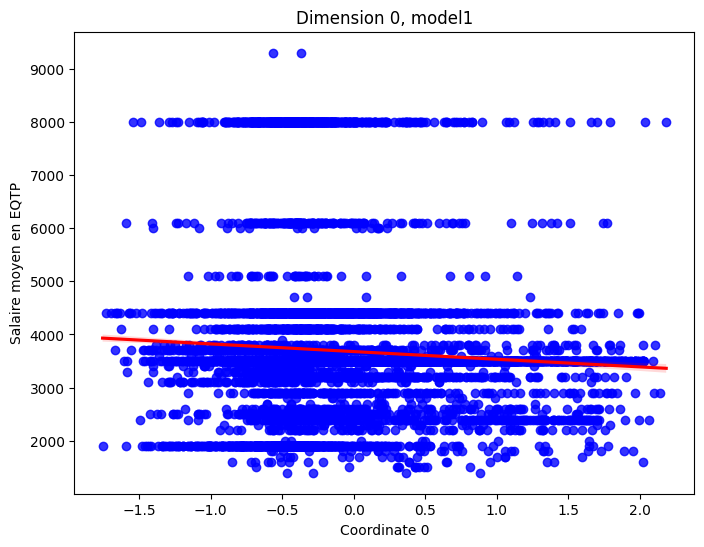

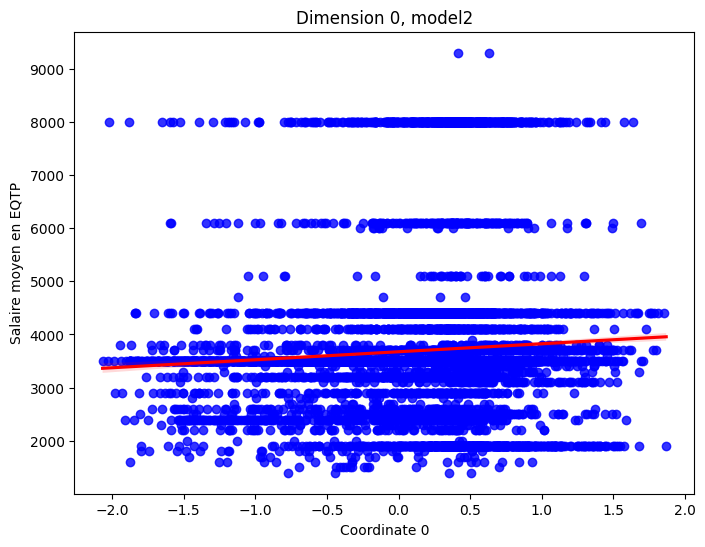

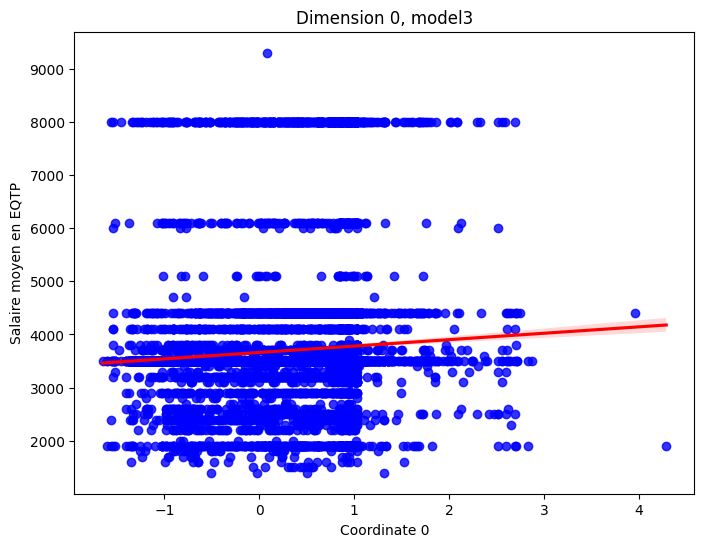

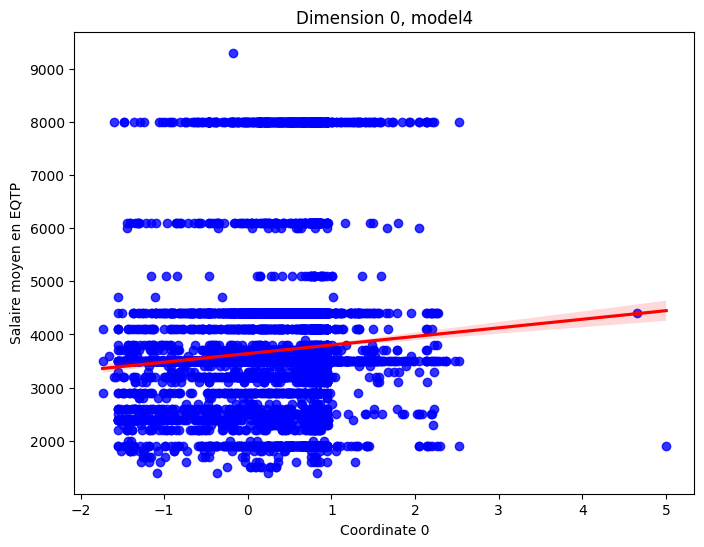

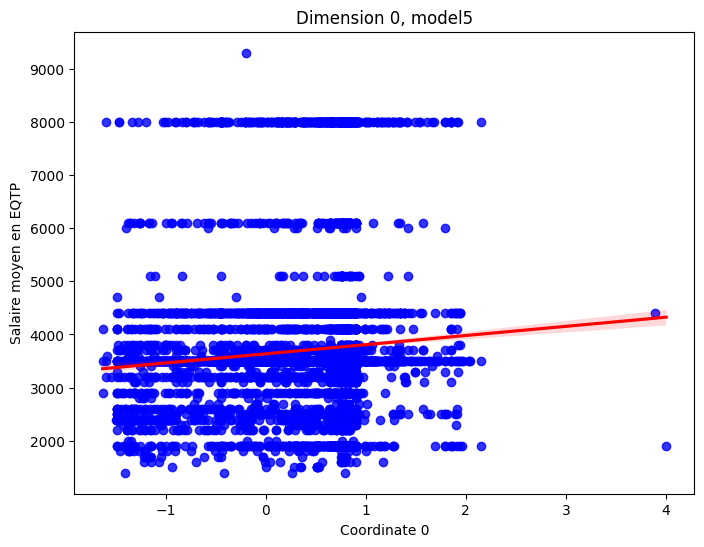

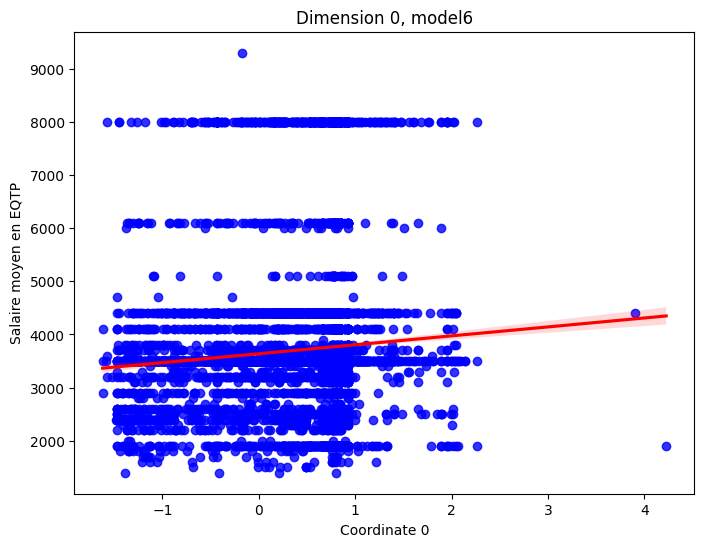

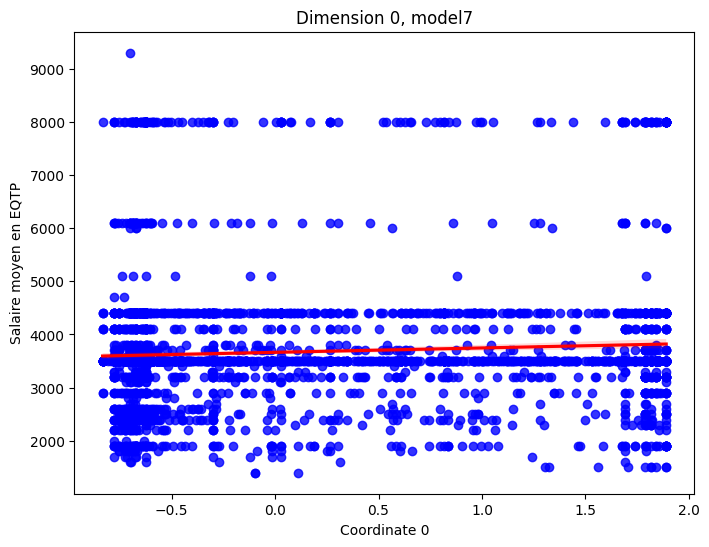

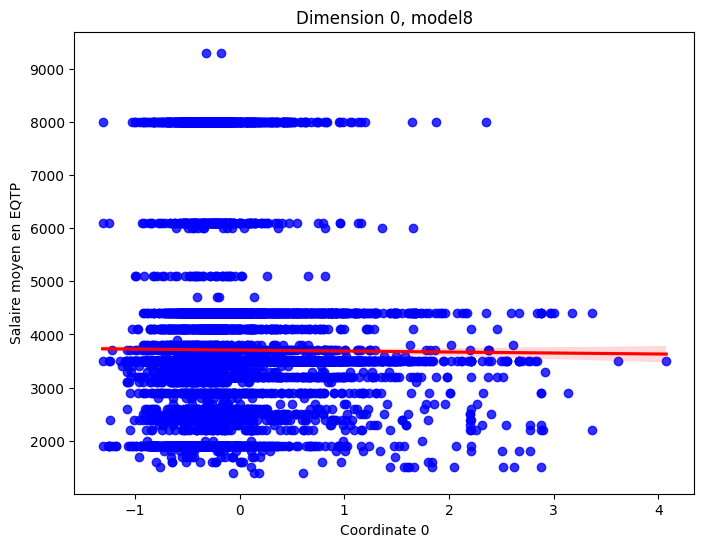

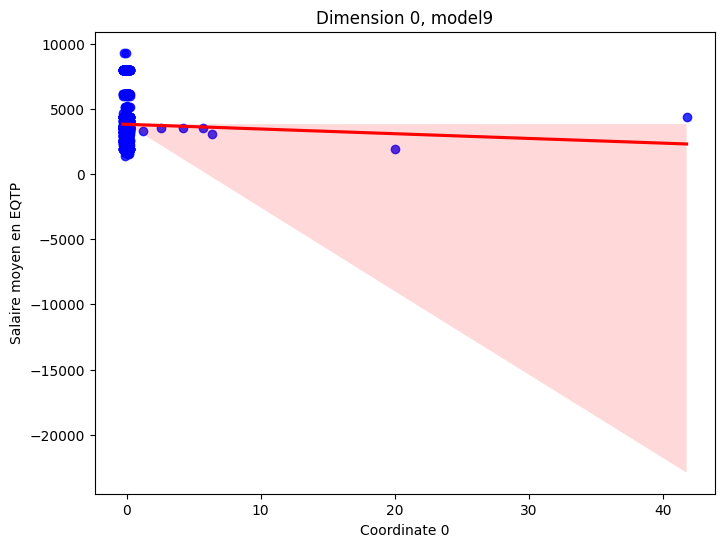

In [81]:
for i, df in enumerate(dataframes, 1):
    X = df[['0']]
    y = df['Salaire moyen en EQTP']

    # Plot relationship between each independent variable and the dependent variable
    for col in X.columns:
        plt.figure(figsize=(8, 6))
        
        # Use seaborn's regplot function to plot the scatter plot with a regression line and confidence interval
        sns.regplot(x=df[col], y=y, ci=95, color='b', line_kws={'color':'red'})
        
        plt.xlabel(f'Coordinate {col}')
        plt.ylabel('Salaire moyen en EQTP')
        plt.title(f'Dimension {col}, model{i}')
        plt.show()

In [84]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize a dictionary to store RMSE values and fitted models for each model
rmse_values = {}
fitted_models = {}

for i, df in enumerate(dataframes, 1):
    # Assume that '0', '1', and '2' are the names of your dimensions
    X = df[['0', '1', '2']]
    y = df['Salaire moyen en EQTP']

    # Add a constant to the independent variables matrix
    X = sm.add_constant(X)

    # Perform multiple linear regression
    model = sm.OLS(y, X)
    results = model.fit()

    # Calculate the RMSE and store it
    y_pred = results.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values[f'model{i}'] = rmse

    # Store the fitted model
    fitted_models[f'model{i}'] = results

    print(f"RMSE for model{i}: {rmse}")

# Print the model with the lowest RMSE
best_model = min(rmse_values, key=rmse_values.get)
print(f"The best model is {best_model} with an RMSE of {rmse_values[best_model]}")

# Print the coefficients of the best model
print(f"Coefficients of the best model: {fitted_models[best_model].params}")

RMSE for model1: 1219.8580710715348
RMSE for model2: 1220.2615565678038
RMSE for model3: 1193.7602963940647
RMSE for model4: 1188.3892011275436
RMSE for model5: 1187.0013680094878
RMSE for model6: 1187.7606180458972
RMSE for model7: 1160.4723422724585
RMSE for model8: 1219.785833154596
RMSE for model9: 1390.7129604749882
The best model is model7 with an RMSE of 1160.4723422724585
Coefficients of the best model: const    3666.368838
0          80.241788
1          15.258734
2         -13.800640
dtype: float64
